### Importing necessary libraries for data manipulation, exploration and scaling

In [110]:
import pandas as pd  # Used for data manipulation
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Used for scaling numerical features

### Loading dataset

In [111]:
file_path = '/content/adult_with_headers.csv'
df = pd.read_csv(file_path)

# **Data Exploration and Preprocessing**

### Basic Data Exploration

In [112]:
# Viewing the first few rows of the dataset to get an understanding of its structure
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [113]:
# Viewing summary statistics of numerical columns (count, mean, std, etc.)
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
# Checking for missing values in the dataset
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [115]:
# Checking the data types of the columns
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


### Handling Missing Values

In [116]:
# We will impute missing values based on the nature of the data
# For numerical columns, using mean imputation
# For categorical columns, using mode imputation

# Checking for numerical and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [117]:
# Imputing missing values for numerical columns with the mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


In [118]:
# Imputing missing values for categorical columns with the mode (most frequent value)
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [119]:
# Verify if missing values are handled
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


### Scaling Techniques

Standard Scaling

In [120]:
# StandardScaler standardizes features by removing the mean and scaling to unit variance
scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[num_cols]), columns=num_cols)

In [121]:
# Viewing the first few rows of the scaled data
df_standard_scaled.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


Min-Max Scaling

In [122]:
# MinMaxScaler scales the features to a fixed range, usually between 0 and 1
scaler_minmax = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=num_cols)

In [123]:
# Viewing the first few rows of the scaled data
df_minmax_scaled.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [124]:
# Standard Scaling: Preferred when the data has a normal distribution. It ensures that each feature contributes equally to the analysis, as they are all scaled similarly
# Commonly used in algorithms like Logistic Regression, Linear Regression, and SVM
# Min-Max Scaling: Preferred when you need to preserve the relationships in the data in terms of proportions (e.g., for algorithms like k-NN or Neural Networks)

# **Encoding Techniques**

### Importing necessary libraries for encoding

In [125]:
from sklearn.preprocessing import LabelEncoder  # Used for label encoding

### Identifying columns for each encoding technique based on number of unique categories

In [126]:
# Get columns with fewer than 5 unique categories
one_hot_cols = [col for col in cat_cols if df[col].nunique() < 5]

In [127]:
# Get columns with 5 or more unique categories
label_encode_cols = [col for col in cat_cols if df[col].nunique() >= 5]

### Applying One-Hot Encoding

In [128]:
# Using pd.get_dummies() to perform One-Hot Encoding on columns with fewer than 5 categories

# drop_first=True is used to avoid multicollinearity by dropping the first category
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

## Applying Label Encoding

In [129]:
# Using LabelEncoder for columns with 5 or more unique categories
label_encoder = LabelEncoder()
for col in label_encode_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [130]:
# Display the first few rows of the dataframe to check the encoding
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,1,0
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,1,0
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,1,0
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,1,0
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,0,0


### Pros and Cons of One-Hot Encoding

In [131]:
# One-Hot Encoding: This method creates a new binary column for each category in a feature
# Pros: Doesn't assume any ordinal relationship between categories; suitable for ML algorithms that can't interpret categorical information directly
# Cons: Increases dataset dimensionality, which can lead to more computational complexity and storage usage, especially with many categories
# Typically used for features with fewer unique categories

## Pros and Cons of Label Encoding

In [132]:
# Label Encoding: Assigns a unique integer to each category in a feature, making it ordinal
# Pros: Keeps dataset size manageable by not increasing dimensions; suitable for tree-based models (e.g., Decision Trees, Random Forests) that can handle label-encoded data
# Cons: Can mislead ML algorithms to interpret categorical features as ordinal, which may reduce performance for linear models if no real order exists
# Preferable for features with many unique categories to avoid excessive dimensionality

# **Feature Engineering**

### Importing necessary libraries for transformation

In [133]:
import numpy as np  # Used for mathematical operations such as log transformations
import matplotlib.pyplot as plt  # Used for visualizations

### Creating New Features

In [134]:
# Creating a feature 'capital_balance' as the net balance of capital gain and loss

# This feature could be useful as it provides a net financial metric, offering insights into overall capital income
df['capital_balance'] = df['capital_gain'] - df['capital_loss']

In [135]:
# Creating a feature 'education_experience_ratio' to represent the relationship between education level and age

# This feature could provide insight into education relative to age, potentially useful for understanding education-based trends
df['education_experience_ratio'] = df['education_num'] / (df['age'] + 1)  # Adding +1 to avoid division by zero

In [136]:
# Display the first few rows of the new features
df[['capital_balance', 'education_experience_ratio']].head()

,capital_balance,education_experience_ratio
0,2174,0.325000
1,0,0.254902
2,0,0.230769
3,0,0.129630
4,0,0.448276


### Identifying Skewed Numerical Features

In [137]:
# Let's visually inspect the distribution of numerical features to identify skewness
# Number of numerical features
num_features = df.select_dtypes(include=['float64', 'int64']).columns

In [138]:
# Calculating the number of rows and columns needed for subplots
n_features = len(num_features)
n_cols = 4  # Setting 4 columns
n_rows = int(np.ceil(n_features / n_cols))

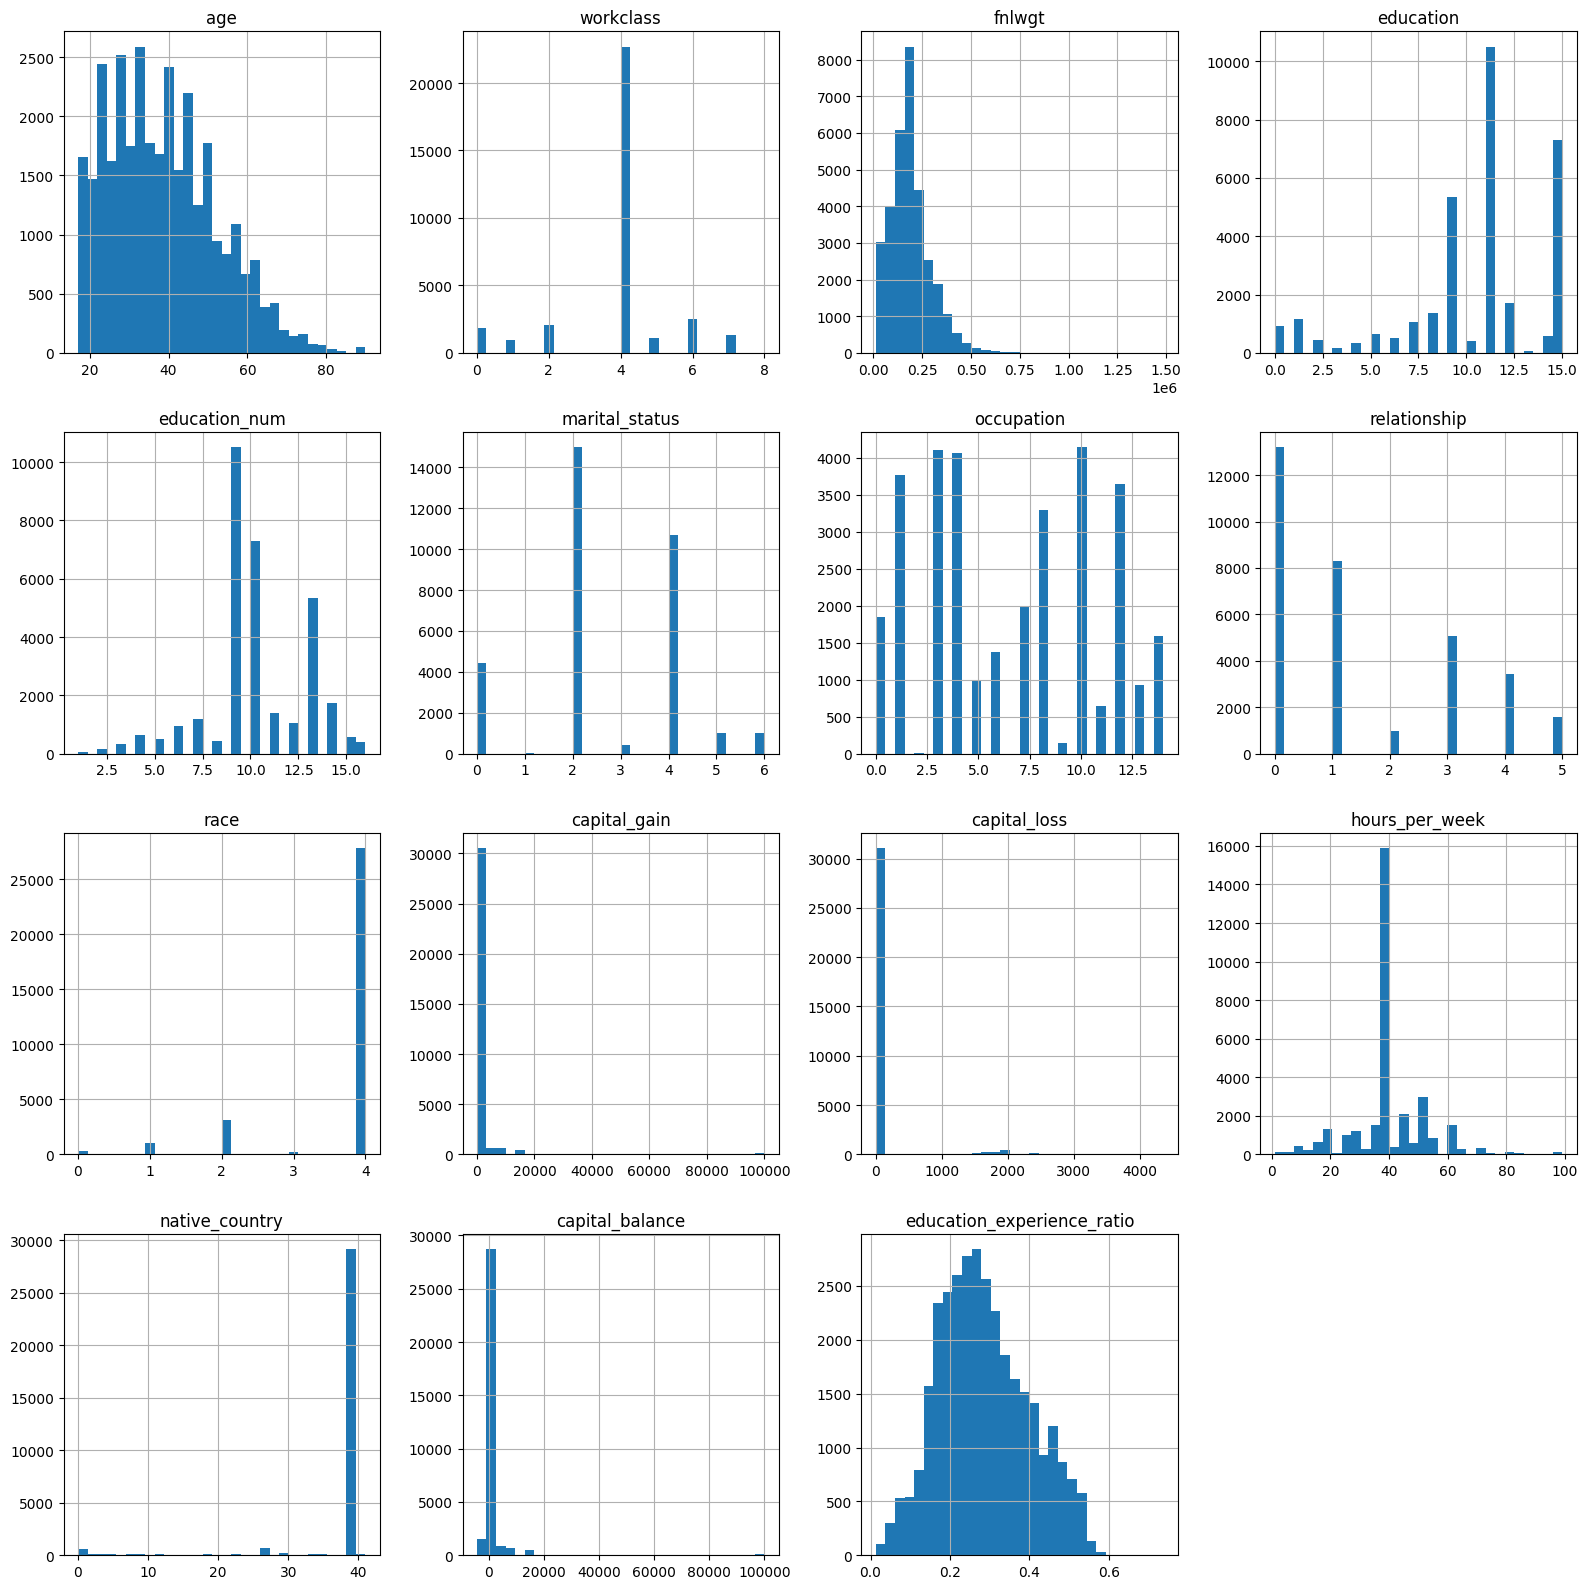

In [139]:
# Plot histograms for each numerical feature to visually inspect skewness
plt.figure(figsize=(16, n_rows * 4))
for i, col in enumerate(num_features, 1):
    plt.subplot(n_rows, n_cols, i)
    df[col].hist(bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

### Applying Log Transformation to Skewed Feature

In [140]:
# Based on inspection, let's assume 'capital_gain' is skewed and apply a log transformation
# Log transformation reduces the impact of large values and helps normalize data

# Applying log transformation to 'capital_gain' and creating a new feature 'log_capital_gain'
# Adding 1 to 'capital_gain' to handle any zero values (log(0) is undefined)
df['log_capital_gain'] = np.log1p(df['capital_gain'])

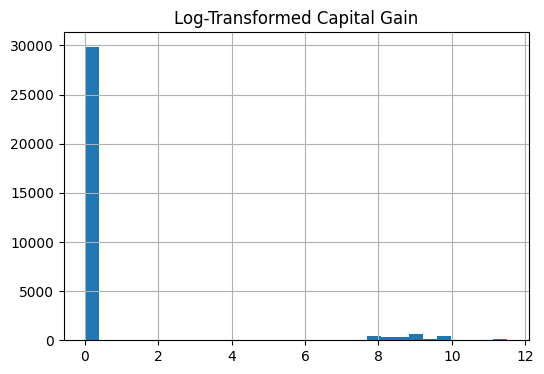

In [141]:
# Displaying the distribution of 'log_capital_gain' to check the effect of transformation
plt.figure(figsize=(6, 4))
df['log_capital_gain'].hist(bins=30)
plt.title('Log-Transformed Capital Gain')
plt.show()

In [142]:
# - Created two new features, `capital_balance` and `education_experience_ratio`, to capture additional insights on capital income and education relative to age.
# - Applied a log transformation to the 'capital_gain' feature to handle skewness, which can improve model performance by reducing the impact of outliers.
# - Log transformation is typically used for skewed data where large outliers can impact the model's learning process, especially for linear models.

# **Feature Selection**

### Importing necessary libraries for Isolation Forest and PPS

In [143]:
!pip install ppscore

In [144]:
from sklearn.ensemble import IsolationForest  # Used to detect outliers
import ppscore as pps  # Used to calculate Predictive Power Score (PPS)
import seaborn as sns  # For visualization

### Outlier Detection and Removal using Isolation Forest

In [145]:
# Setting up Isolation Forest with a contamination level of 0.05 (5% of data are assumed as outliers)
iso_forest = IsolationForest(contamination=0.05, random_state=42)

In [146]:
# Fitting Isolation Forest on numerical features only

# Outlier predictions: -1 indicates an outlier, 1 indicates an inlier
outliers = iso_forest.fit_predict(df[num_features])

In [147]:
# Adding the outlier labels as a new column to the dataframe
df['outlier'] = outliers

In [ ]:
# Removing rows labeled as outliers
df = df[df['outlier'] == 1]  # Keep only inliers
df.drop('outlier', axis=1, inplace=True)  # Drop the 'outlier' column after filtering

In [148]:
# Isolation Forest and Outliers:
# Outliers can affect model performance by distorting the learned patterns, as many ML models are sensitive to extreme values
# Removing outliers helps the model generalize better by focusing on the main data distribution
# Isolation Forest works well in high-dimensional spaces, using random partitions to isolate potential outliers

## Feature Relationships using Predictive Power Score (PPS)

In [149]:
# PPS measures how well one feature can predict another, ranging from 0 (no predictive power) to 1 (high predictive power).

# Calculating the PPS matrix
pps_matrix = pps.matrix(df)
pps_matrix = pps_matrix[(pps_matrix['ppscore'] > 0.1)]  # Filtering for strong relationships

<ipython-input-150-2b09178e5482>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="viridis")


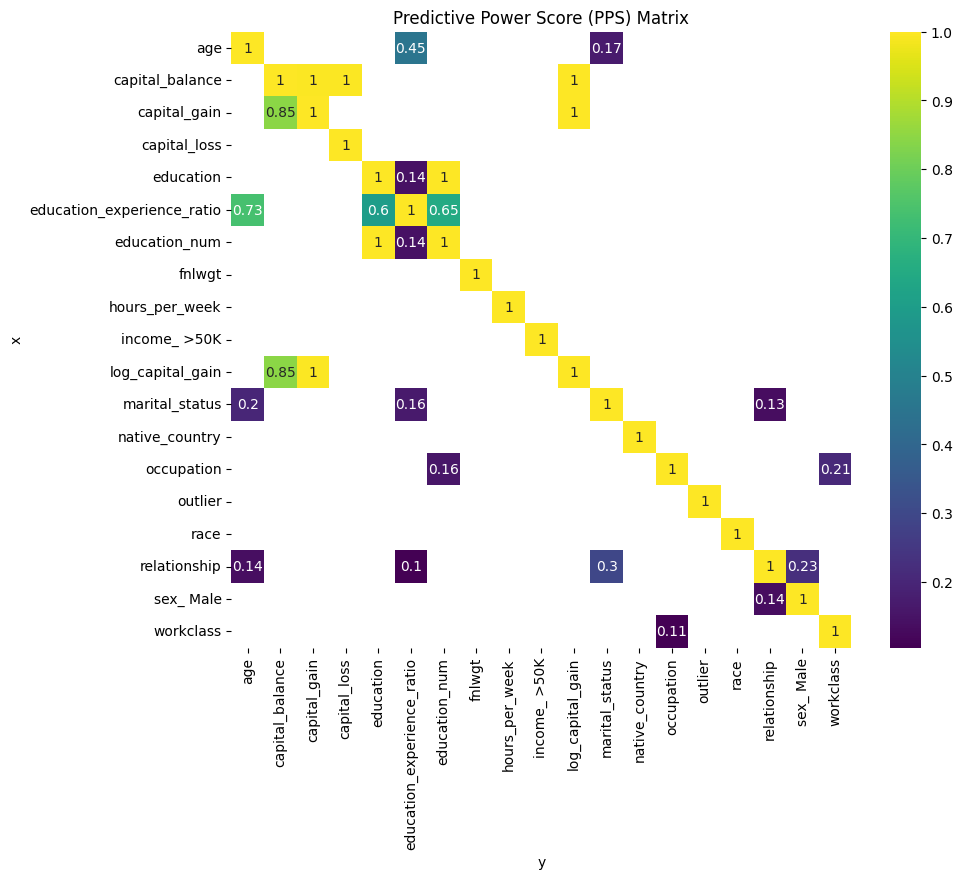

In [150]:
# Visualizing the PPS matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix.pivot("x", "y", "ppscore"), annot=True, cmap="viridis")
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

## Comparing PPS with Correlation Matrix

In [151]:
# Calculating the correlation matrix of the dataset
corr_matrix = df.corr()

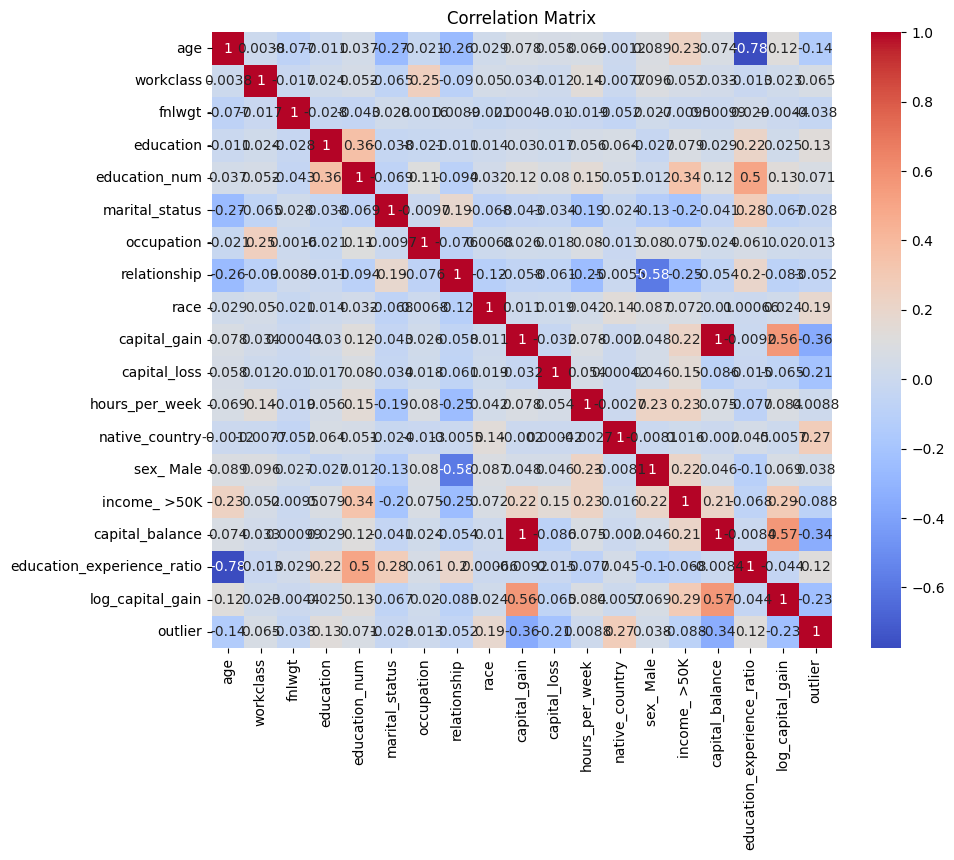

In [152]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [153]:
# - PPS: Unlike correlation, which only measures linear relationships, PPS measures the predictive strength between features,
#   detecting both linear and non-linear interactions. A high PPS score suggests one feature can predict another effectively.
# - Correlation Matrix: It shows the linear relationship between features (values between -1 and 1),
#   with 1 indicating a perfect positive linear relationship and -1 a perfect negative relationship.
# - Comparing the PPS and correlation matrix highlights differences, especially in non-linear relationships not captured by correlation.